# Load all the required library 

- Pandas comparable with Excel. Pandas is built on Numpy.  
- Numpy is for linear algebra, Fourier transform, and random number capabilities
- Matplotlib and seaborn are for graphs
- Sklearn for machine learning library 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression

# Load the data

In [2]:
path = 'C:/Users/u0107464/OneDrive/PythonScript/Arch_model_design_space_exp/Model_extracted_data/Data/Correlation_analysis/'
data = pd.read_csv(path+'Correlation_analysis_chiller_data.csv')

# Initial idea of the data

In [3]:
data.head()

,$X,$Y,$H,$SL1,$SL2,$SL3,$SL4,$WWR_S,$WWR_N,$WWR_E,...,$ChillerTypeCat,Peak: Ground Floor,Peak: Intermediate Floor,Peak: Top Floor,Mean: Ground Floor,Mean: Intermediate Floor,Mean: Top Floor,Peak: Chiller Energy,Mean: Chiller Energy,Total: Chiller Energy
0,20.0,20.0,3.000,0.01000,0.01000,0.01000,0.01000,0.0100,0.0100,0.0100,...,0,11337.83316,11414.46115,10412.70053,2113.167496,2487.05647,2407.259478,24023.1954,9511.314472,8.331911e+07
1,50.0,50.0,4.500,2.50500,2.50500,2.50500,2.50500,0.4800,0.4800,0.4800,...,0,153385.91250,156708.68690,131153.98670,21212.919620,23818.69559,21388.286380,180486.0413,55010.154130,4.818890e+08
2,65.0,35.0,3.750,1.25750,3.75250,3.75250,1.25750,0.7150,0.7150,0.7150,...,1,101713.18150,105411.62670,95695.13032,15004.982930,17410.29156,15835.306020,107845.8289,41685.852000,3.651681e+08
3,35.0,65.0,5.250,3.75250,1.25750,1.25750,3.75250,0.2450,0.2450,0.2450,...,0,117188.67960,124974.75170,113182.75430,19501.604010,22144.84171,20849.448860,182746.3519,61094.038630,5.351838e+08
4,42.5,42.5,4.875,4.37625,1.88125,0.63375,1.88125,0.8325,0.8325,0.5975,...,1,202009.34090,209944.82950,170183.17070,21693.299280,23712.53308,21126.595210,275340.6081,90263.074890,7.907045e+08


In [4]:
data.columns

Index(['$X', '$Y', '$H', '$SL1', '$SL2', '$SL3', '$SL4', '$WWR_S', '$WWR_N',
       '$WWR_E', ' $WWR_W', '$ORI', '$WALL_U', '$WIN_U', '$GFLOOR_U',
       ' $FLOOR_SH', '$ROOF_U', '$WIN_G', '$ACH', '$LHG', '$EHG',
       '$ChillerCOP', '$BoilerEfficiency', '$ChillerPumpTypeCat',
       '$BoilerPumpTypeCat', '$ChillerTypeCat', 'Peak: Ground Floor',
       'Peak: Intermediate Floor', 'Peak: Top Floor', 'Mean: Ground Floor',
       'Mean: Intermediate Floor', 'Mean: Top Floor', 'Peak: Chiller Energy',
       'Mean: Chiller Energy', 'Total: Chiller Energy'],
      dtype='object')

In [5]:
data.describe()

,$X,$Y,$H,$SL1,$SL2,$SL3,$SL4,$WWR_S,$WWR_N,$WWR_E,...,$ChillerTypeCat,Peak: Ground Floor,Peak: Intermediate Floor,Peak: Top Floor,Mean: Ground Floor,Mean: Intermediate Floor,Mean: Top Floor,Peak: Chiller Energy,Mean: Chiller Energy,Total: Chiller Energy
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,...,4500.000000,4500.000000,4.500000e+03,4500.000000,4500.000000,4500.000000,4500.000000,4.500000e+03,4500.000000,4.500000e+03
mean,50.017578,50.002578,4.498527,2.502031,2.501615,2.504500,2.505292,0.480275,0.479707,0.480241,...,0.499333,137889.767218,4.348202e+05,125083.567595,20712.528801,75599.127636,21589.030238,2.911769e+05,101808.056058,8.918386e+08
std,17.322179,17.323634,0.866154,1.440758,1.440689,1.440707,1.440686,0.271381,0.271375,0.271394,...,0.500055,70088.535009,3.451883e+05,61093.359096,10860.635127,62269.478774,11225.173658,1.925209e+05,66490.230952,5.824544e+08
min,20.000000,20.000000,3.000000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,...,0.000000,11323.335280,1.141446e+04,10399.375350,2113.167496,2487.056470,2407.259478,2.402320e+04,9434.070998,8.264246e+07
25%,34.992676,34.992676,3.749268,1.256282,1.256282,1.256282,1.256891,0.244885,0.244885,0.244885,...,0.000000,84457.472250,1.655355e+05,78011.481200,12462.219070,27482.536790,13077.789000,1.514525e+05,53591.794567,4.694641e+08
50%,49.985352,49.985352,4.498535,2.502563,2.502563,2.502563,2.503782,0.479771,0.479771,0.479771,...,0.000000,125632.954750,3.424381e+05,114395.971450,18762.916390,58205.032445,19384.319960,2.411453e+05,85162.206215,7.460209e+08
75%,64.978027,64.978027,5.247803,3.748845,3.748845,3.748845,3.750673,0.714656,0.714656,0.714656,...,1.000000,179025.424300,6.141979e+05,161306.232100,26941.787840,108004.963200,27957.939685,3.815975e+05,133061.798275,1.165621e+09
max,79.970703,79.970703,5.997070,4.995127,4.995127,4.995127,4.997563,0.949541,0.949541,0.949541,...,1.000000,499700.688800,2.497191e+06,408189.815400,70820.685020,415246.675100,69058.712140,1.557656e+06,524017.105100,4.590390e+09


# Visualisation with Pandas

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002183DB67748>,
      dtype=object)

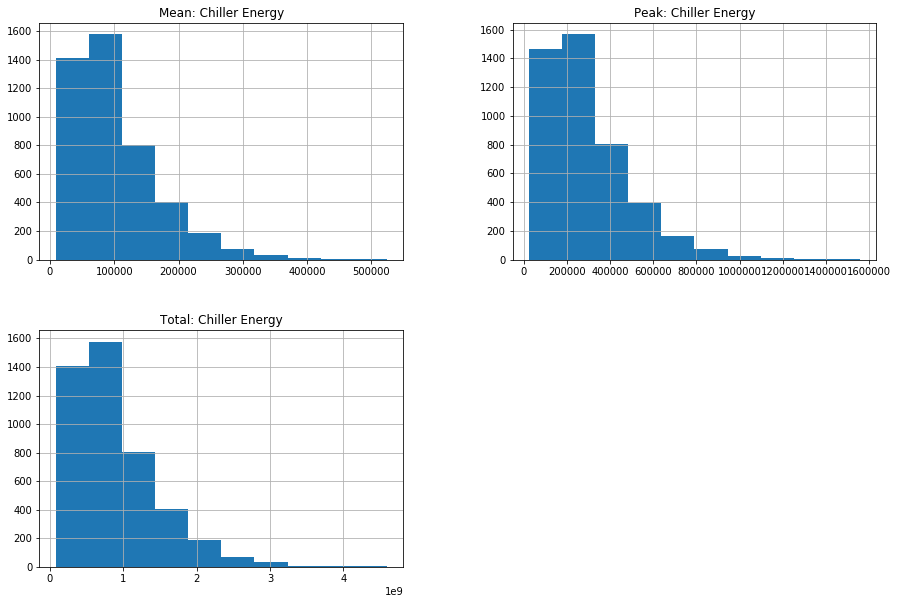

In [6]:
data.filter(like='Energy').hist(figsize=(15,10))

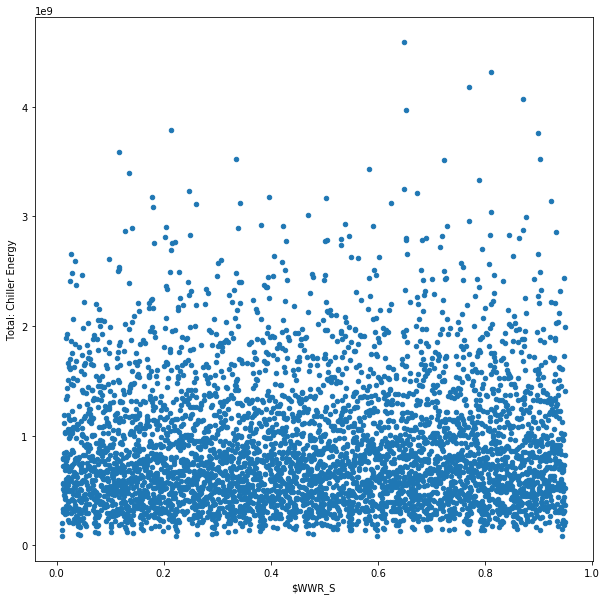

In [7]:
data.plot.scatter(x='$WWR_S',y='Total: Chiller Energy',figsize=(10,10))

# Simple feature selection method

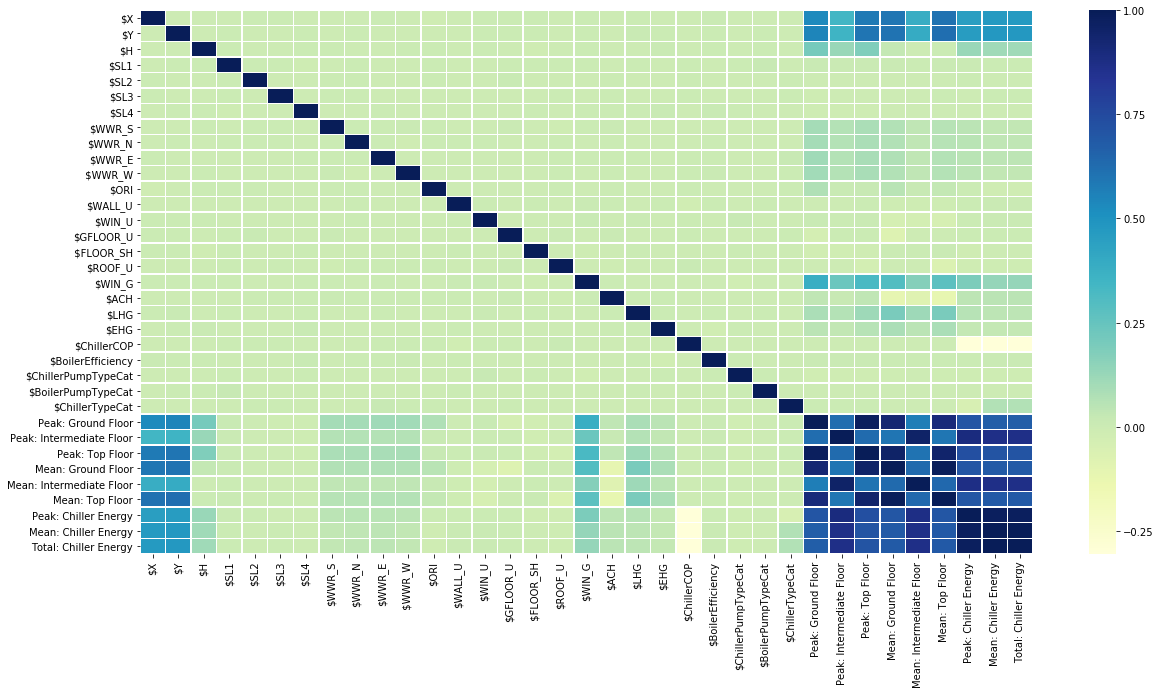

In [8]:
corr = data.corr()

f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corr,linewidths=.5,ax=ax,cmap="YlGnBu")

In [9]:
x_list = ['$X', '$Y', '$H', '$SL1', '$SL2', '$SL3', '$SL4', '$WWR_S', '$WWR_N',
       '$WWR_E', ' $WWR_W', '$ORI', '$WALL_U', '$WIN_U', '$GFLOOR_U',
       ' $FLOOR_SH', '$ROOF_U', '$WIN_G', '$ACH', '$LHG', '$EHG',
       '$ChillerCOP', '$BoilerEfficiency', '$ChillerPumpTypeCat',
       '$BoilerPumpTypeCat', '$ChillerTypeCat','Peak: Ground Floor',
       'Peak: Intermediate Floor', 'Peak: Top Floor', 'Mean: Ground Floor',
       'Mean: Intermediate Floor', 'Mean: Top Floor']

x = data.filter(items=x_list).values
y = data['Total: Chiller Energy'].values

mi = mutual_info_regression(x,y)

for i,parameter_list in enumerate(x_list):
    print(parameter_list,': ',mi[i])

$X :  0.11038140208104519
$Y :  0.12019835659059286
$H :  0.0
$SL1 :  0.0
$SL2 :  0.0
$SL3 :  0.0
$SL4 :  0.0
$WWR_S :  0.0
$WWR_N :  0.0
$WWR_E :  0.0
 $WWR_W :  0.0
$ORI :  0.01328142089610651
$WALL_U :  0.0
$WIN_U :  0.0
$GFLOOR_U :  0.0
 $FLOOR_SH :  0.0
$ROOF_U :  0.0
$WIN_G :  0.0
$ACH :  0.0
$LHG :  0.0
$EHG :  0.0
$ChillerCOP :  0.024515511202858775
$BoilerEfficiency :  0.0
$ChillerPumpTypeCat :  0.010811919415321114
$BoilerPumpTypeCat :  0.008193613315771398
$ChillerTypeCat :  0.0
Peak: Ground Floor :  0.3921896394400841
Peak: Intermediate Floor :  0.8306012888390271
Peak: Top Floor :  0.4430796011451035
Mean: Ground Floor :  0.4137535660036802
Mean: Intermediate Floor :  0.8349701289410394
Mean: Top Floor :  0.429623505518145


# Hypothesis testing

In [10]:
from scipy import stats

In [11]:
x1 = data['Peak: Ground Floor'].values
x2 = data['Peak: Intermediate Floor'].values
x3= data['Peak: Top Floor'].values

s,p_value = stats.f_oneway(x1,x2,x3) 

In [12]:
alpha = 0.05

if p_value > alpha:
    print('Samples are likely drawn from the same distributions (fail to reject H0)')
else:
    print('Samples are likely drawn from different distributions (reject H0)')

Samples are likely drawn from different distributions (reject H0)


<function matplotlib.pyplot.show>

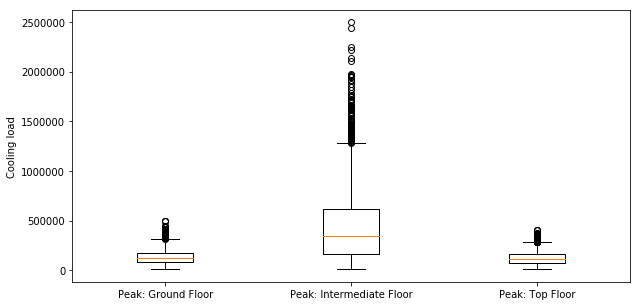

In [13]:
x_lable_list = ['Peak: Ground Floor','Peak: Intermediate Floor', 'Peak: Top Floor']
x = data.filter(items=x_lable_list).values

plt.figure(figsize=(10,5))
plt.boxplot(x,labels=x_lable_list)
plt.ylabel('Cooling load')
plt.show

Samples are likely drawn from different distributions (reject H0)


<function matplotlib.pyplot.show>

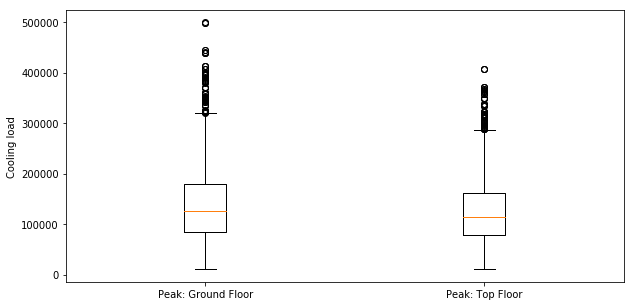

In [14]:
x1 = data['Peak: Ground Floor'].values
x2= data['Peak: Top Floor'].values

s,p_value = stats.f_oneway(x1,x2) 

alpha = 0.05

if p_value > alpha:
    print('Samples are likely drawn from the same distributions (fail to reject H0)')
else:
    print('Samples are likely drawn from different distributions (reject H0)')

    
x_lable_list = ['Peak: Ground Floor','Peak: Top Floor']
x = data.filter(items=x_lable_list).values

plt.figure(figsize=(10,5))
plt.boxplot(x,labels=x_lable_list)
plt.ylabel('Cooling load')
plt.show